In [1]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
crime_df = df

In [3]:
df.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4018830907041,40188309,7041,VEHICLE THEFT,"VEHICLE, RECOVERED, AUTO",Sunday,2004-02-15,2021-01-22 02:00:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13605159706372,136051597,6372,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Thursday,2013-03-14,2021-01-22 09:21:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
2,13618826906244,136188269,6244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,2013-10-08,2021-01-22 19:30:00,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
3,4098938926105,40989389,26105,OTHER OFFENSES,FALSE REPORT OF BOMB,Sunday,2004-08-29,2021-01-22 22:47:00,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,5085058207021,50850582,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Friday,2005-07-29,2021-01-22 21:00:00,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,66.0


In [4]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [5]:
df.Time = df.Time.apply(lambda x: x.time())

<AxesSubplot:xlabel='Time'>

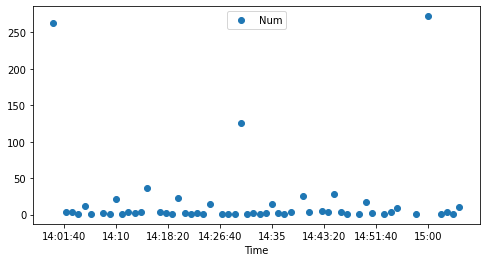

In [96]:
jan_2009 = df.Date > datetime.datetime(year=2009, month=1, day=1)
april_2009 = df.Date < datetime.datetime(year=2009, month=7, day=1)
valeus = df.Time.loc[(df.Category == 'LARCENY/THEFT') & (jan_2009) & (april_2009) & (df.Time > datetime.time(13,59))& (df.Time <= datetime.time(15,5))].groupby(df.Time).agg("count")

df2 = valeus.to_frame()
df2.columns = ["Num"]
df2.reset_index(inplace=True)
df2.plot(x='Time', y='Num', lw=0, marker='o', figsize=(8,4))

Point: Most crimes are commited at 5 minute, half hour and hour intervals

In [7]:
df.location

0                          POINT (-120.50000000000001 90)
1              POINT (-122.421594519119 37.7707674171464)
2              POINT (-122.422367409563 37.7698682392455)
3              POINT (-122.452716700987 37.7457451434135)
4              POINT (-122.448127287476 37.7121636146229)
                                ...                      
2160948     POINT (-122.41198764359528 37.78502266227863)
2160949    POINT (-122.39774442710336 37.729934693604356)
2160950      POINT (-122.42335514444734 37.7787466492059)
2160951    POINT (-122.41936035276092 37.761835801237645)
2160952     POINT (-122.41492076300118 37.74504465100493)
Name: location, Length: 2160953, dtype: object

In [8]:
[float(x) for x in df.location[0].replace("POINT (", "").replace(")", "").split()]
df.location = df.location.apply(lambda x: float(x.replace("POINT (", "").replace(")", "").split()[1]))

In [30]:
drunk = df.loc[((df.Category == "DRUNKENNESS")) & (jan_2009) & (df.Date < datetime.datetime(year=2015, month=7, day=1))]
vandal = df.loc[((df.Category == "VANDALISM")) & (jan_2009) & (df.Date < datetime.datetime(year=2015, month=7, day=1))]

(array([ 10.,  24.,  95.,   8.,  24.,  21.,  33.,  44.,  37.,  13.,  25.,
         20.,  60.,  40.,  30.,  22.,  39.,  40.,  19.,  35.,  45., 143.,
         82.,  80.,  44., 102., 122., 215.,  79.,  62., 254., 106.,  82.,
        231., 174., 395., 323., 498., 260., 138.,  67.,  42.,  37.,  48.,
        213.,  69.,  21.,  20.,  22.,  31.]),
 array([37.70831097, 37.71033817, 37.71236536, 37.71439256, 37.71641975,
        37.71844695, 37.72047414, 37.72250134, 37.72452853, 37.72655573,
        37.72858292, 37.73061011, 37.73263731, 37.7346645 , 37.7366917 ,
        37.73871889, 37.74074609, 37.74277328, 37.74480048, 37.74682767,
        37.74885487, 37.75088206, 37.75290925, 37.75493645, 37.75696364,
        37.75899084, 37.76101803, 37.76304523, 37.76507242, 37.76709962,
        37.76912681, 37.77115401, 37.7731812 , 37.77520839, 37.77723559,
        37.77926278, 37.78128998, 37.78331717, 37.78534437, 37.78737156,
        37.78939876, 37.79142595, 37.79345315, 37.79548034, 37.79750753,
 

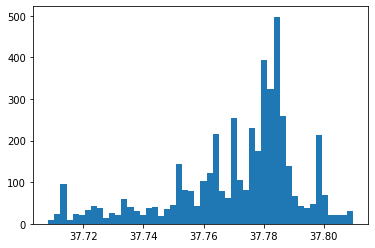

In [31]:
from matplotlib import pyplot as plt 
#np.histogram(data.location,50)
plt.hist(drunk.location, 50)

(array([3.700e+02, 9.990e+02, 5.840e+02, 5.800e+02, 6.590e+02, 1.062e+03,
        6.840e+02, 6.420e+02, 5.860e+02, 1.148e+03, 1.044e+03, 7.420e+02,
        7.670e+02, 6.710e+02, 6.130e+02, 6.940e+02, 5.680e+02, 5.390e+02,
        6.780e+02, 9.100e+02, 1.096e+03, 9.290e+02, 9.420e+02, 1.224e+03,
        1.346e+03, 1.722e+03, 9.250e+02, 1.174e+03, 1.336e+03, 1.550e+03,
        2.947e+03, 1.696e+03, 2.551e+03, 2.549e+03, 2.204e+03, 1.887e+03,
        1.384e+03, 8.540e+02, 8.390e+02, 8.170e+02, 9.210e+02, 5.990e+02,
        4.830e+02, 5.740e+02, 4.020e+02, 1.410e+02, 0.000e+00, 1.000e+00,
        1.000e+00, 6.000e+00]),
 array([37.7079219 , 37.71016298, 37.71240405, 37.71464512, 37.71688619,
        37.71912726, 37.72136833, 37.72360941, 37.72585048, 37.72809155,
        37.73033262, 37.73257369, 37.73481476, 37.73705584, 37.73929691,
        37.74153798, 37.74377905, 37.74602012, 37.7482612 , 37.75050227,
        37.75274334, 37.75498441, 37.75722548, 37.75946655, 37.76170763,
        37.

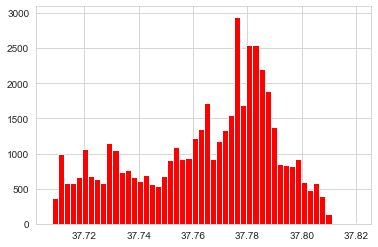

In [342]:
plt.hist(vandal.location, 50, color="r")

,Time,Num
0,14:00,263
1,14:02,3
2,14:03,3
3,14:04,1
4,14:05,12


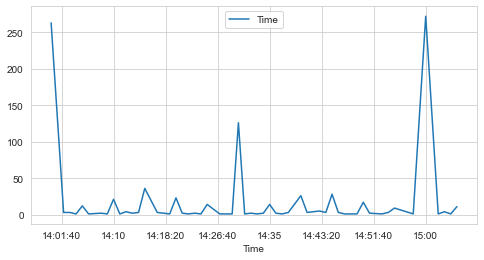

In [340]:
#df2.Time = df2.Time.apply(lambda x: x.strftime("%H:%M"))
#df2.plot(kind="kde", x="Time")
df3 = valeus.to_frame()
df3.plot(figsize=(8,4))
df2.head()

<AxesSubplot:xlabel='Total_Minute', ylabel='Density'>

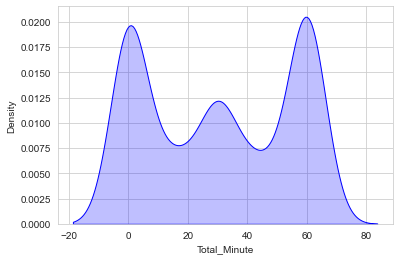

In [261]:
import seaborn as sns
sns.set_style('whitegrid')
df3 = df.loc[(df.Category == 'LARCENY/THEFT') & (jan_2009) & (april_2009) & (df.Time > datetime.time(13,59))& (df.Time <= datetime.time(15,5)), ["Category", "Time"]]
df3["Hour"] = df3.Time.apply(lambda x: x.hour)
df3["Minute"] = df3.Time.apply(lambda x: x.minute)
df3["Total_Minute"] = (df3.Hour-14)*60+df3.Minute
#df3.Total_Minute.groupby(df3.Total_Minute).agg("count")
#max(df3.Minute)
sns.kdeplot(data = df3.Total_Minute, shade=True, color="b")

(-40.0, 85.0)

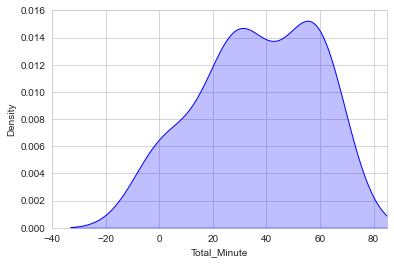

In [273]:
sns.kdeplot(data = df3.Total_Minute.sample(25), shade=True, color="b")
lt.xlim(-40, 85)

((array([-3.61660634, -3.38012302, -3.2497258 , ...,  3.2497258 ,
          3.38012302,  3.61660634]),
  array([37.70831097, 37.70847539, 37.708841  , ..., 37.80859051,
         37.8096707 , 37.8096707 ])),
 (0.020291170670470104, 37.771023060235656, 0.9554336131993445))

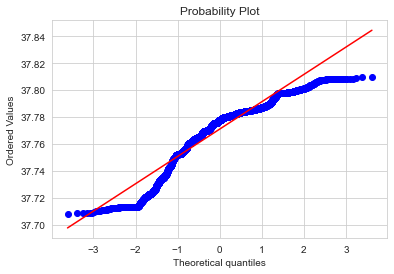

In [282]:
import scipy.stats as stats
stats.probplot(drunk.location, plot=plt)

((array([-4.18040398, -3.97414212, -3.86167005, ...,  3.86167005,
          3.97414212,  4.18040398]),
  array([37.7079219 , 37.70796836, 37.70800346, ..., 37.81992346,
         37.81997549, 37.81997549])),
 (0.02501004854721379, 37.76388039927713, 0.9727541038707492))

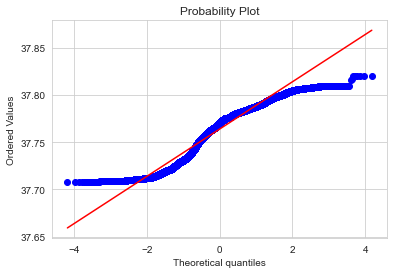

In [284]:
stats.probplot(vandal.location, plot=plt)

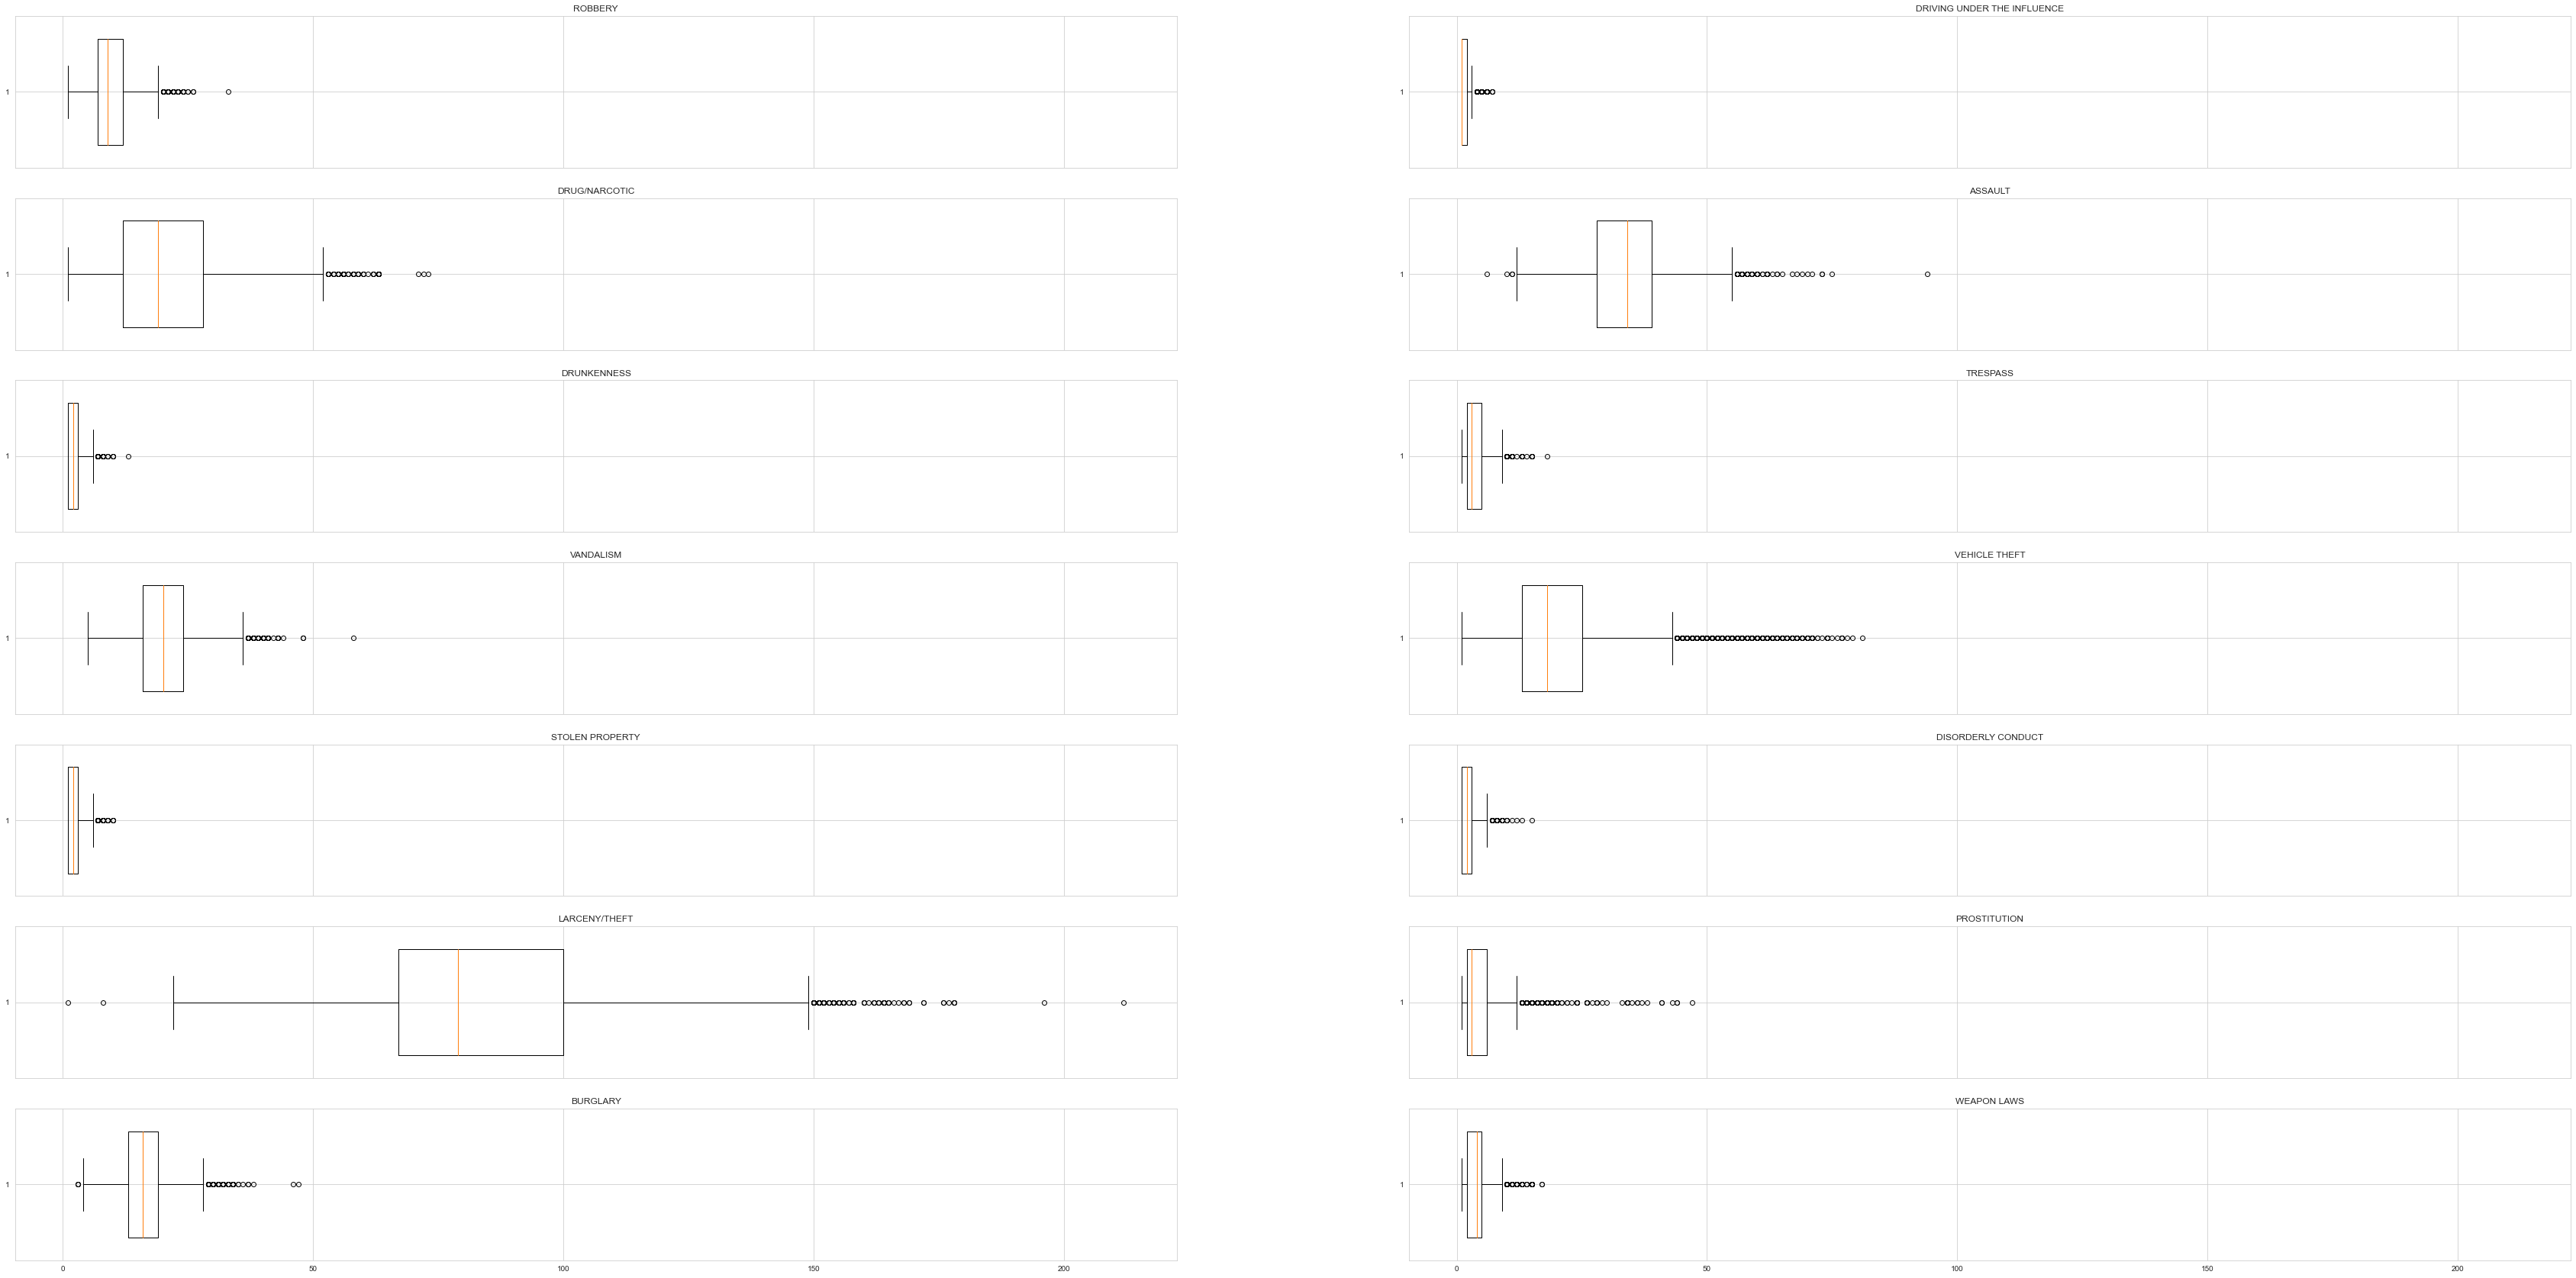

In [339]:
fig, axes = plt.subplots(ncols=2, nrows=7, sharex=True, figsize=(60,30))

for ax, crime in zip(axes.flat, focuscrimes):
    ax.boxplot(df.Date.loc[crime==df.Category].groupby(df.Date).agg("count"), vert=False, widths=0.7)
    ax.set_title(crime)

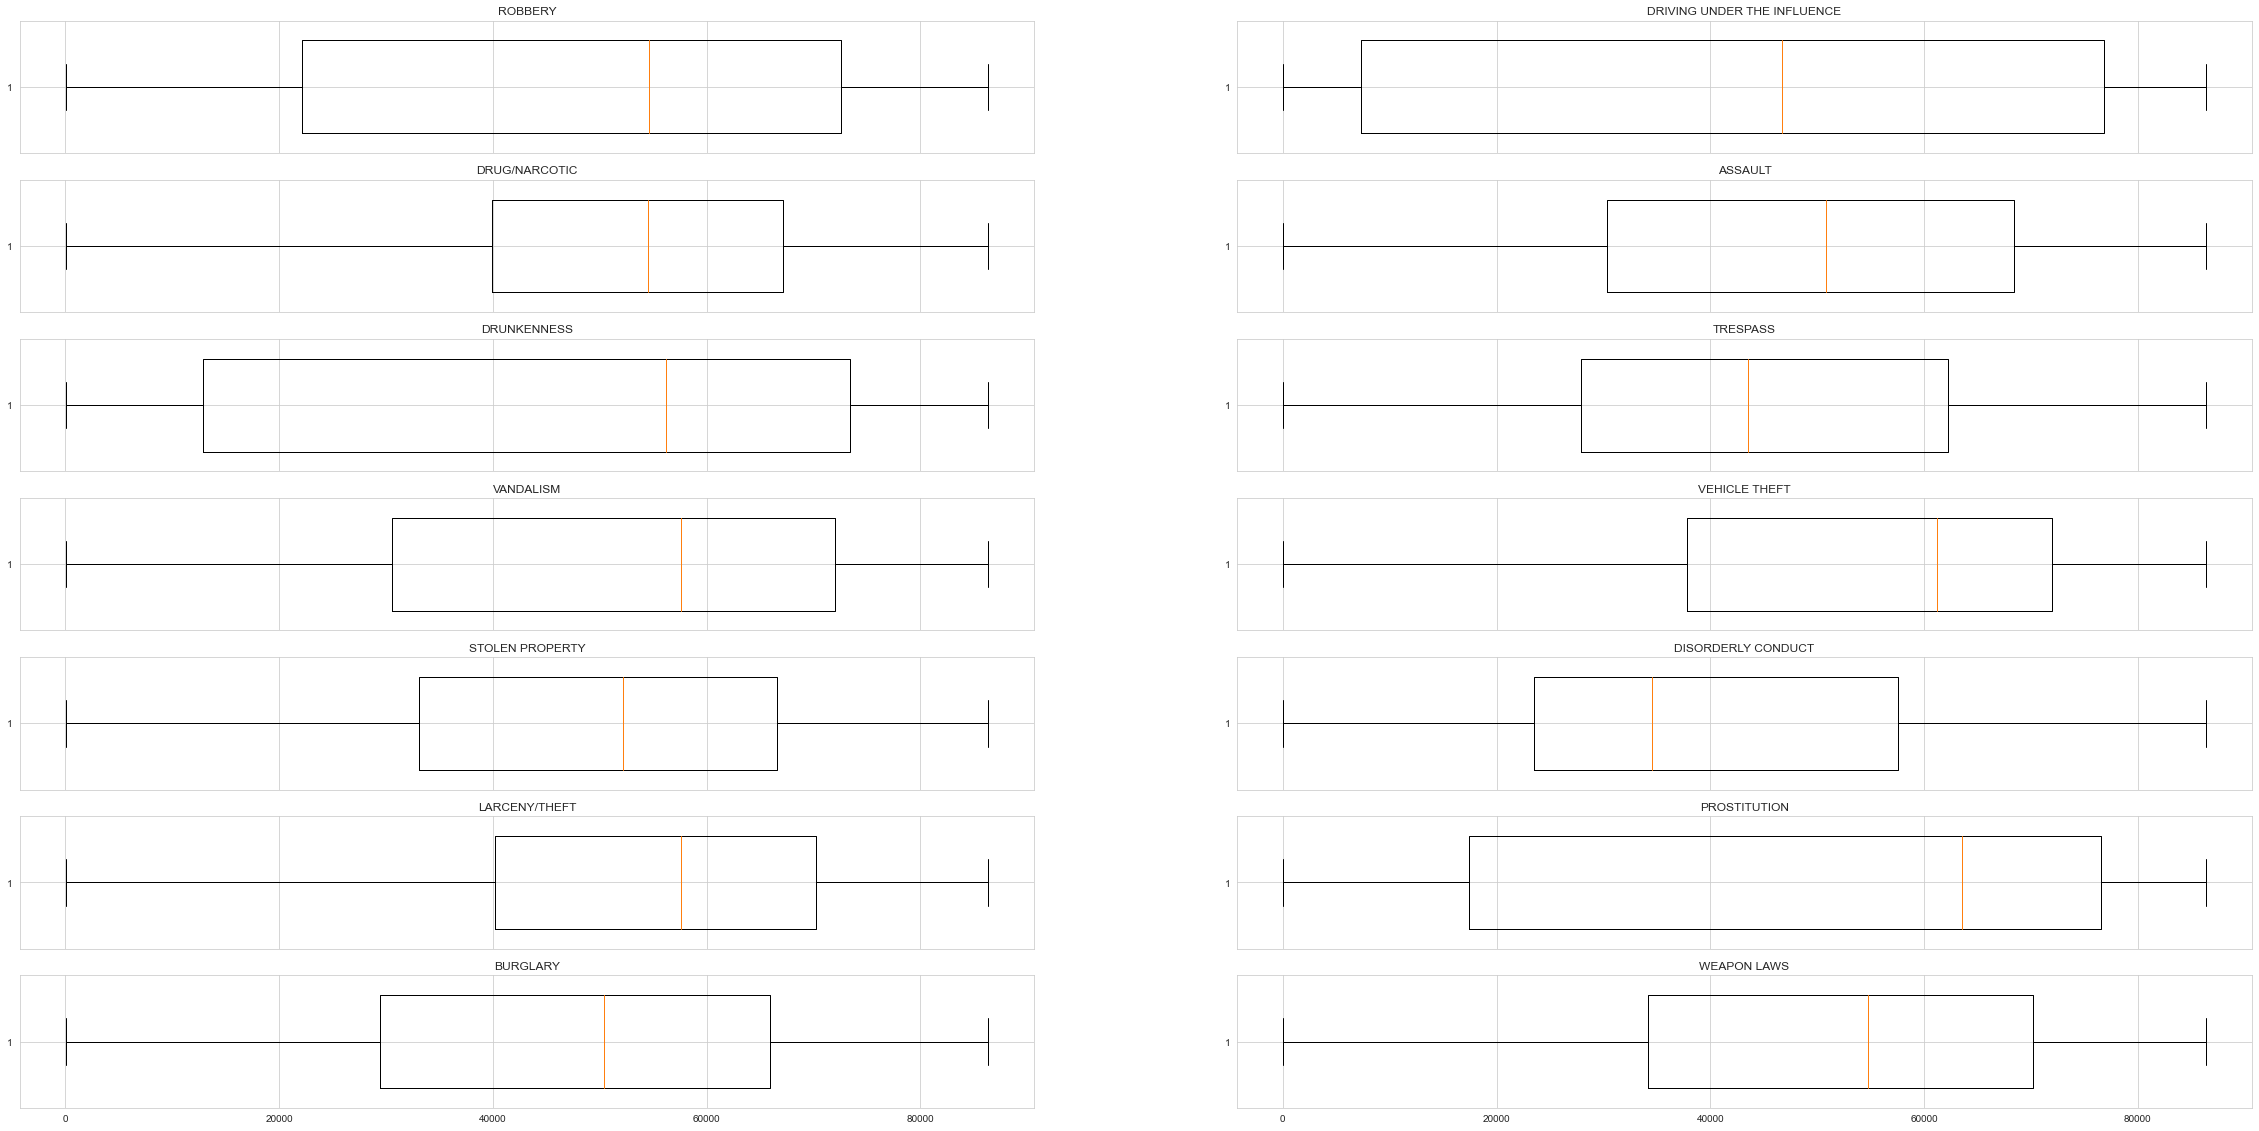

In [338]:
df["TimeInSeconds"] = df.Time.apply(lambda x: x.hour*3600+x.minute*60+x.second)

fig, axes = plt.subplots(ncols=2, nrows=7, sharex=True, figsize=(40,20))


for ax, crime in zip(axes.flat, focuscrimes):
    ax.boxplot(df.TimeInSeconds.loc[crime==df.Category], vert=False, widths=0.7)
    ax.set_title(crime)